<a href="https://colab.research.google.com/github/GustMont/Explorando_a_PokeAPI/blob/main/Case_Explorando_a_PokeAPI__Gustavo_Monteiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo: Desenvolver uma aplicação que utilize a PokeAPI para obter dados sobre os Pokémon e exibi-los de forma organizada.

Referências utilizadas:
ChatGPT

## Requisitos

1. A aplicação deve ser desenvolvida em python.
2. A PokeAPI está disponível em https://pokeapi.co/
3. Utilize as seguintes funcionalidades da API:
   - Obter lista de Pokémon.
   - Obter detalhes de um Pokémon específico.
   - Obter informações sobre os tipos de Pokémon.
4. Exiba os dados dos Pokémon de forma organizada.

## Desafios

1. Gerar gráficos para análise dos Pokemons.
2. Dado 2 tipos, qual leva vantagem em uma batalha.

## Sugestões para a implementação

1. Ao escolher um Pokémon, exiba os detalhes desse Pokémon, como altura, peso, habilidades, tipos, etc...
2. Ao escolher um tipo, exiba os detalhes desse tipo, como contagem, todos os pokemons desse tipo específico, etc...


## Perguntas

1. Como você pretende obter os dados da PokeAPI? Quais bibliotecas ou frameworks você considera usar?

Resposta: As bibliotecas que utizarei serão as para construção de gráficos e tabelas, e as que permitam acessar a API.
2. Como você planeja estruturar e organizar o código da aplicação?

Resposta: Para facilitar a visualização dos requisitos, irei separar o código em relação ao que foi solicitado em cada requisito.
3. Quais informações dos Pokémon você pretende exibir na parte de detalhes? Como pretende formatar essas informações?

Resposta: Vou mostrar o que foi pedido, como número, nome, altura, peso, tipagem, habilidades, e também um gráfico contendo os stats do pokémon que foi indicado pelo usuário. Sobre a formatação, usarei a padrão, para o indicar o nome do atributo que será mostrado, e o valor deste atributo. Na tipagem, será adicionado a cor do tipo, para facilitar visualização.
4. Como você planeja lidar com erros ou falhas na obtenção dos dados da API?

Resposta: Para os erros, será necessário pesquisar e mexer aos poucos no código, para saber quando o erro aparece, e até onde o código funciona sem erros.
5. Que melhorias ou recursos adicionais você considera implementar para tornar a aplicação mais interessante?

Resposta: Eu gostei da adição de cores, nas tipagens, para facilitar a visualização pelo usuário, e para deixar a aplicação mais interessante e divertida. acredito que seria interessante adicionar outras personalizações, como imagens, e melhorar a forma que as informações aparecem na tela, como no gráfico, que os textos ficaram sobrepostos, mas não consegui ajustar no momento.

# Importação de bibliotecas

In [ ]:
import requests
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from IPython.display import Markdown, display

# Obter Lista de Pokémon

In [ ]:
def obter_lista_pokemon():
    url = "https://pokeapi.co/api/v2/pokemon?limit=151"
    response = requests.get(url)

    data = response.json()
    results = data['results']
    pokemon_list = []
    for index, pokemon in enumerate(results, start=1):
        pokemon_name = pokemon['name']
        pokemon_number = str(index).zfill(3)
        pokemon_list.append(f"#{pokemon_number} {pokemon_name.capitalize()}")
    return pokemon_list


pokemon_list = obter_lista_pokemon()
if pokemon_list:
    for pokemon in pokemon_list:
        print(pokemon)


#001 Bulbasaur
#002 Ivysaur
#003 Venusaur
#004 Charmander
#005 Charmeleon
#006 Charizard
#007 Squirtle
#008 Wartortle
#009 Blastoise
#010 Caterpie
#011 Metapod
#012 Butterfree
#013 Weedle
#014 Kakuna
#015 Beedrill
#016 Pidgey
#017 Pidgeotto
#018 Pidgeot
#019 Rattata
#020 Raticate
#021 Spearow
#022 Fearow
#023 Ekans
#024 Arbok
#025 Pikachu
#026 Raichu
#027 Sandshrew
#028 Sandslash
#029 Nidoran-f
#030 Nidorina
#031 Nidoqueen
#032 Nidoran-m
#033 Nidorino
#034 Nidoking
#035 Clefairy
#036 Clefable
#037 Vulpix
#038 Ninetales
#039 Jigglypuff
#040 Wigglytuff
#041 Zubat
#042 Golbat
#043 Oddish
#044 Gloom
#045 Vileplume
#046 Paras
#047 Parasect
#048 Venonat
#049 Venomoth
#050 Diglett
#051 Dugtrio
#052 Meowth
#053 Persian
#054 Psyduck
#055 Golduck
#056 Mankey
#057 Primeape
#058 Growlithe
#059 Arcanine
#060 Poliwag
#061 Poliwhirl
#062 Poliwrath
#063 Abra
#064 Kadabra
#065 Alakazam
#066 Machop
#067 Machoke
#068 Machamp
#069 Bellsprout
#070 Weepinbell
#071 Victreebel
#072 Tentacool
#073 Tentacruel
#

# Obter detalhes do pokémon

In [ ]:
def obter_detalhes_pokemon(pokemon_input):
    if pokemon_input.isdigit():
        url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_input}"
    else:
        url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_input.lower()}"

    response = requests.get(url)

    data = response.json()
    pokemon_details = {
        "Número": data['id'],
        "Nome": data['name'].capitalize(),
        "Altura": data['height'],
        "Peso": data['weight'],
        "Habilidades": [ability['ability']['name'] for ability in data['abilities']],
        "Tipos": [type['type']['name'] for type in data['types']]
    }
    return pokemon_details

def display_colored_text(text, color):
    color_code = color.lower() if color.lower() in ["red", "green", "blue", "yellow", "cyan", "magenta", "black", "white", "gray"] else "black"  # Cor padrão: preto

    display(Markdown(f"<font color='{color_code}'>{text}</font>"))


pokemon_input = input("Digite o número ou o nome de um Pokémon: ")
pokemon_details = obter_detalhes_pokemon(pokemon_input)

if pokemon_details:
    display_colored_text("Detalhes do Pokémon:", "blue")
    for key, value in pokemon_details.items():
        if key == "Tipos":
            for tipo in value:
                if tipo == "water":
                    display_colored_text(f"{key}: {tipo}", "blue")
                elif tipo in ["fire", "fighting", "rock"]:
                    display_colored_text(f"{key}: {tipo}", "red")
                elif tipo in ["electric", "ground"]:
                    display_colored_text(f"{key}: {tipo}", "yellow")
                elif tipo in ["grass", "bug"]:
                    display_colored_text(f"{key}: {tipo}", "green")
                elif tipo in ["ice", "flying"]:
                    display_colored_text(f"{key}: {tipo}", "cyan")
                elif tipo in ["fairy", "psychic", "poison"]:
                    display_colored_text(f"{key}: {tipo}", "magenta")
                elif tipo == "steel":
                    display_colored_text(f"{key}: {tipo}", "gray")
                elif tipo in ["dark", "ghost", "poison"]:
                    display_colored_text(f"{key}: {tipo}", "black")
                else:
                    display_colored_text(f"{key}: {tipo}", "white")
        else:
            display_colored_text(f"{key}: {value}", "white")


Digite o número ou o nome de um Pokémon: 1


<font color='white'>Detalhes do Pokémon:</font>

<font color='white'>Número: 1</font>

<font color='white'>Nome: Bulbasaur</font>

<font color='white'>Altura: 7</font>

<font color='white'>Peso: 69</font>

<font color='white'>Habilidades: ['overgrow', 'chlorophyll']</font>

<font color='green'>Tipos: grass</font>

<font color='magenta'>Tipos: poison</font>

Digite o número ou o nome de um Pokémon: staryu


<font color='blue'>Detalhes do Pokémon:</font>

<font color='blue'>Número: 120</font>

<font color='blue'>Nome: Staryu</font>

<font color='blue'>Altura: 8</font>

<font color='blue'>Peso: 345</font>

<font color='blue'>Habilidades: ['illuminate', 'natural-cure', 'analytic']</font>

<font color='blue'>Tipos: water</font>

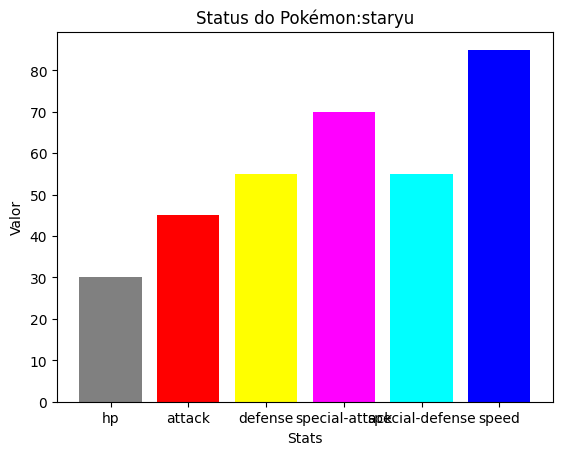

In [ ]:
def obter_detalhes_pokemon(pokemon_input):
    if pokemon_input.isdigit():
        url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_input}"
    else:
        url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_input.lower()}"

    response = requests.get(url)

    data = response.json()
    pokemon_details = {
        "Número": data['id'],
        "Nome": data['name'].capitalize(),
        "Altura": data['height'],
        "Peso": data['weight'],
        "Habilidades": [ability['ability']['name'] for ability in data['abilities']],
        "Tipos": [type['type']['name'] for type in data['types']],
        "Stats": {stat['stat']['name']: stat['base_stat'] for stat in data['stats']}
    }
    return pokemon_details

def display_colored_text(text, color):
    color_code = color.lower() if color.lower() in ["red", "green", "blue", "yellow", "cyan", "magenta", "black", "white", "gray"] else "black"  # Cor padrão: preto

    display(Markdown(f"<font color='{color_code}'>{text}</font>"))

def gerar_grafico_status(stats):
    labels = stats.keys()
    values = stats.values()

    colors = ["gray", "red", "yellow", "magenta", "cyan", "blue"]

    plt.bar(labels, values, color=colors)
    plt.xlabel('Stats')
    plt.ylabel('Valor')
    plt.title(f'Status do Pokémon:{pokemon_input}')
    plt.show()

pokemon_input = input("Digite o número ou o nome de um Pokémon: ")
pokemon_details = obter_detalhes_pokemon(pokemon_input)

if pokemon_details:
    display_colored_text("Detalhes do Pokémon:")
    for key, value in pokemon_details.items():
        if key == "Stats":
            gerar_grafico_status(value)
        elif key == "Tipos":
            for tipo in value:
                if tipo == "water":
                    display_colored_text(f"{key}: {tipo}", "blue")
                elif tipo in ["fire", "fighting", "rock"]:
                    display_colored_text(f"{key}: {tipo}", "red")
                elif tipo in ["electric", "ground"]:
                    display_colored_text(f"{key}: {tipo}", "yellow")
                elif tipo in ["grass", "bug"]:
                    display_colored_text(f"{key}: {tipo}", "green")
                elif tipo in ["ice", "flying"]:
                    display_colored_text(f"{key}: {tipo}", "cyan")
                elif tipo in ["fairy", "psychic", "poison"]:
                    display_colored_text(f"{key}: {tipo}", "magenta")
                elif tipo == "steel":
                    display_colored_text(f"{key}: {tipo}", "gray")
                elif tipo in ["dark", "ghost", "poison"]:
                    display_colored_text(f"{key}: {tipo}", "black")
                else:
                    display_colored_text(f"{key}: {tipo}", "white")
        else:
            display_colored_text(f"{key}: {value}")


# Informação sobre os tipos

In [ ]:
def obter_detalhes_tipo(tipo):
    url = f"https://pokeapi.co/api/v2/type/{tipo.lower()}"
    response = requests.get(url)
    data = response.json()
    pokemons = [(pokemon['pokemon']['name'], pokemon['pokemon']['url'].split('/')[-2]) for pokemon in data['pokemon']]
    contagem = len(pokemons)
    return pokemons, contagem

def exibir_tabela_detalhes_pokemon(pokemons):
    table = PrettyTable(["Número do Pokémon", "Nome do Pokémon"])
    for nome, numero in pokemons:
        table.add_row([numero, nome])
    print(table)

tipo_input = input("Digite o tipo de Pokémon (Water, Fire, etc): ")
pokemons, contagem = obter_detalhes_tipo(tipo_input)

if pokemons:
    print(f"Quantidade de Pokémon do tipo {tipo_input.capitalize()}: {contagem}")
    print("Detalhes do Tipo de Pokémon:")
    exibir_tabela_detalhes_pokemon(pokemons)


Digite o tipo de Pokémon (Water, Fire, etc): fire
Quantidade de Pokémon do tipo Fire: 101
Detalhes do Tipo de Pokémon:
+-------------------+---------------------------+
| Número do Pokémon |      Nome do Pokémon      |
+-------------------+---------------------------+
|         4         |         charmander        |
|         5         |         charmeleon        |
|         6         |         charizard         |
|         37        |           vulpix          |
|         38        |         ninetales         |
|         58        |         growlithe         |
|         59        |          arcanine         |
|         77        |           ponyta          |
|         78        |          rapidash         |
|        126        |           magmar          |
|        136        |          flareon          |
|        146        |          moltres          |
|        155        |         cyndaquil         |
|        156        |          quilava          |
|        157        |         t

# Vantagem entre dois tipos

In [ ]:
def obter_vantagem_tipo(tipo1, tipo2):
    fraquezas = {
        'normal': ['fighting'],
        'fighting': ['flying', 'psychic', 'fairy'],
        'flying': ['electric', 'ice', 'rock'],
        'poison': ['ground', 'psychic'],
        'ground': ['water', 'grass', 'ice'],
        'rock': ['water', 'grass', 'fighting', 'ground', 'steel'],
        'bug': ['fire', 'flying', 'rock'],
        'ghost': ['ghost', 'psychic'],
        'steel': ['fire', 'fighting', 'ground'],
        'fire': ['water', 'ground', 'rock'],
        'water': ['electric', 'grass'],
        'grass': ['fire', 'ice', 'poison', 'flying', 'bug'],
        'electric': ['ground'],
        'psychic': ['bug', 'ghost', 'dark'],
        'ice': ['fire', 'fighting', 'rock', 'steel'],
        'dragon': ['ice', 'dragon', 'fairy'],
        'dark': ['fighting', 'bug', 'fairy'],
        'fairy': ['poison', 'steel'],
    }

    if tipo1.lower() in fraquezas:
        if tipo2.lower() in fraquezas[tipo1.lower()]:
            return tipo2
    if tipo2.lower() in fraquezas:
        if tipo1.lower() in fraquezas[tipo2.lower()]:
            return tipo1

    return "Nenhum dos tipos tem vantagem sobre o outro."

tipo1 = input("Digite o primeiro tipo de Pokémon: ")
tipo2 = input("Digite o segundo tipo de Pokémon: ")

vantagem = obter_vantagem_tipo(tipo1, tipo2)

print(f"O tipo que tem vantagem sobre o outro é:")

if vantagem == "water":
    display_colored_text(f"{vantagem}", "blue")
elif vantagem in ["fire", "fighting", "rock"]:
    display_colored_text(f"{vantagem}", "red")
elif vantagem in ["electric", "ground"]:
    display_colored_text(f"{vantagem}", "yellow")
elif vantagem in ["grass", "bug"]:
    display_colored_text(f"{vantagem}", "green")
elif vantagem in ["ice", "flying"]:
    display_colored_text(f"{vantagem}", "cyan")
elif vantagem in ["fairy", "psychic", "poison"]:
    display_colored_text(f"{vantagem}", "magenta")
elif vantagem == "steel":
    display_colored_text(f"{vantagem}", "gray")
elif vantagem in ["dark", "ghost", "poison"]:
    display_colored_text(f"{vantagem}", "black")
else:
    display_colored_text(f"{vantagem}", "white")


Digite o primeiro tipo de Pokémon: fire
Digite o segundo tipo de Pokémon: ground
O tipo que tem vantagem sobre o outro é:


<font color='yellow'>ground</font>